In [1]:
#
# Constant-current constant-voltage charge with US06 Drive Cycle using Experiment Class.
#
import pybamm
import pandas as pd
import os

os.chdir(pybamm.__path__[0] + "/..")

#pybamm.set_logging_level("INFO")

# import drive cycle from file
drive_cycle_current = pd.read_csv(
    "pybamm/input/drive_cycles/US06.csv", comment="#", header=None
).to_numpy()

experiment = pybamm.Experiment(
    [
        (
            "Charge at 1 A until 4.0 V",
            "Hold at 4.0 V until 50 mA",
            "Rest for 30 minutes",
            "Run US06_A (A)",
            "Rest for 30 minutes",
        ),
    ],
    drive_cycles={
        "US06_A": drive_cycle_current,
    },
)

model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model, experiment=experiment, solver=pybamm.CasadiSolver())
sim.solve()

# Show all plots
sim.plot()


interactive(children=(FloatSlider(value=0.0, description='t', max=1.4691423480380155, step=0.01469142348038015…

In [2]:
sim.solution.cycles[0].steps[3]["Time [s]"].entries[0]
print(
sim.solution.cycles[0].steps[3]["Time [s]"].entries[-1]
-sim.solution.cycles[0].steps[3]["Time [s]"].entries[0]
)

599.999999999


In [3]:
import pybamm
import pandas as pd
import os

# Path_NiallDMA = "InputData/" # for HPC
Path_InputBasic = "D:/OneDrive - Imperial College London/SimDataSave/InputData/"
Path_Expt4 = "Expt 4 - Drive Cycle Aging (Control)/"
drive_cycle_current_2 = pd.read_csv(
    Path_InputBasic+Path_Expt4+"Expt_4_DriveCycle.csv", 
    comment="#", header=None).to_numpy()

In [6]:
print(drive_cycle_current_2[400])
print(len(drive_cycle_current_2))

[4.00000000e+02 1.89874197e-01]
18005


In [7]:
V_max = 4.2;        V_min = 2.5; 
Exp_Age_4 = pybamm.Experiment(
    [
        (
            "Discharge at 1C for 3 minutes",
            "Run Expt_4 (A) until 2.5V",
            f"Charge at 0.3C until {V_max} V",  
            f"Hold at {V_max}V until C/100",
        ),
    ]  ,
    drive_cycles={
        "Expt_4": drive_cycle_current_2,
    },
)

model = pybamm.lithium_ion.DFN()
sim2 = pybamm.Simulation(model, experiment=Exp_Age_4, solver=pybamm.CasadiSolver())
sol2 = sim2.solve()

# Show all plots
sim2.plot()


At t = 360.795, , mxstep steps taken before reaching tout.
At t = 61.796, , mxstep steps taken before reaching tout.
At t = 61.7967, , mxstep steps taken before reaching tout.
At t = 61.7954, , mxstep steps taken before reaching tout.
At t = 24.7969 and h = 5.43759e-15, the corrector convergence failed repeatedly or with |h| = hmin.
2023-05-17 23:26:50.369 - [WARNING] callbacks.on_experiment_infeasible(231): 

	Experiment is infeasible: 'event: Minimum voltage [V]' was triggered during 'Run Expt_4 (A) until 2.5V'. The returned solution only contains up to step 2 of cycle 1. 


interactive(children=(FloatSlider(value=0.0, description='t', max=3514.1849189386644, step=35.14184918938665),…

In [8]:
print(
sim2.solution.cycles[0].steps[1]["Time [s]"].entries[-1]
-sim2.solution.cycles[0].steps[1]["Time [s]"].entries[0]
)

3334.1849189376644


Discharge capacity [A.h]


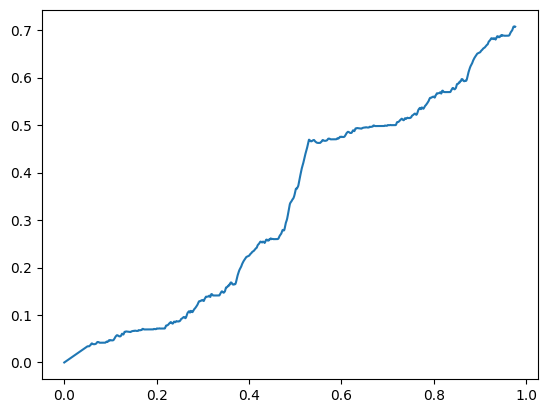

In [9]:
model.variables.search("Discharge capacity [A.h]")
import matplotlib.pyplot as plt
plt.plot(
    sim2.solution["Time [h]"].entries,
    sim2.solution["Discharge capacity [A.h]"].entries)